<h2>Machine Learning Assignment for Yeast Classification</h2>
<h2>Group ID: ML Group 107</h2>
<ol>
  <li>SUTAR MOHASIN APPASO</li>
  <li>PARAB ADESH ASHOK ARATI</li>
  <li>JEET ARORA</li>
</ol>

In [284]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss, f1_score, roc_auc_score, mean_absolute_error, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE


In [226]:
#importing the dataset
df = pd.read_csv("yeast1.csv")

<h3>Data Preproccessing and Cleaning</h3>
<p>Here we perform the EDA on the dataset.<p>
<p>Data contains 8 Features and plotted the outliers using box plot.</p>
<p>df['name'].value_counts() shows that ERL class is present in only 5 rows, This shows that in the target variable, there is a class imbalance</p>

In [227]:
df.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [228]:
df.tail()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC
1483,0.65,0.54,0.54,0.13,0.5,0.0,0.53,0.22,CYT


df.columns

In [229]:
df.shape

(1484, 9)

In [230]:
#checking for null values in any column
df.isnull().sum()

mcg     0
gvh     0
alm     0
mit     0
erl     0
pox     0
vac     0
nuc     0
name    0
dtype: int64

In [231]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mcg,1484.0,0.500121,0.137299,0.11,0.41,0.49,0.58,1.00
gvh,1484.0,0.499933,0.123924,0.13,0.42,0.49,0.57,1.00
alm,1484.0,0.500034,0.086670,0.21,0.46,0.51,0.55,1.00
mit,1484.0,0.261186,0.137098,0.00,0.17,0.22,0.32,1.00
erl,1484.0,0.504717,0.048351,0.50,0.50,0.50,0.50,1.00
pox,1484.0,0.007500,0.075683,0.00,0.00,0.00,0.00,0.83
vac,1484.0,0.499885,0.057797,0.00,0.48,0.51,0.53,0.73
nuc,1484.0,0.276199,0.106491,0.00,0.22,0.22,0.30,1.00


In [232]:
df['name'].unique()

array(['MIT', 'NUC', 'CYT', 'ME1', 'EXC', 'ME2', 'ME3', 'VAC', 'POX',
       'ERL'], dtype=object)

In [233]:
df['name'].value_counts()

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: name, dtype: int64

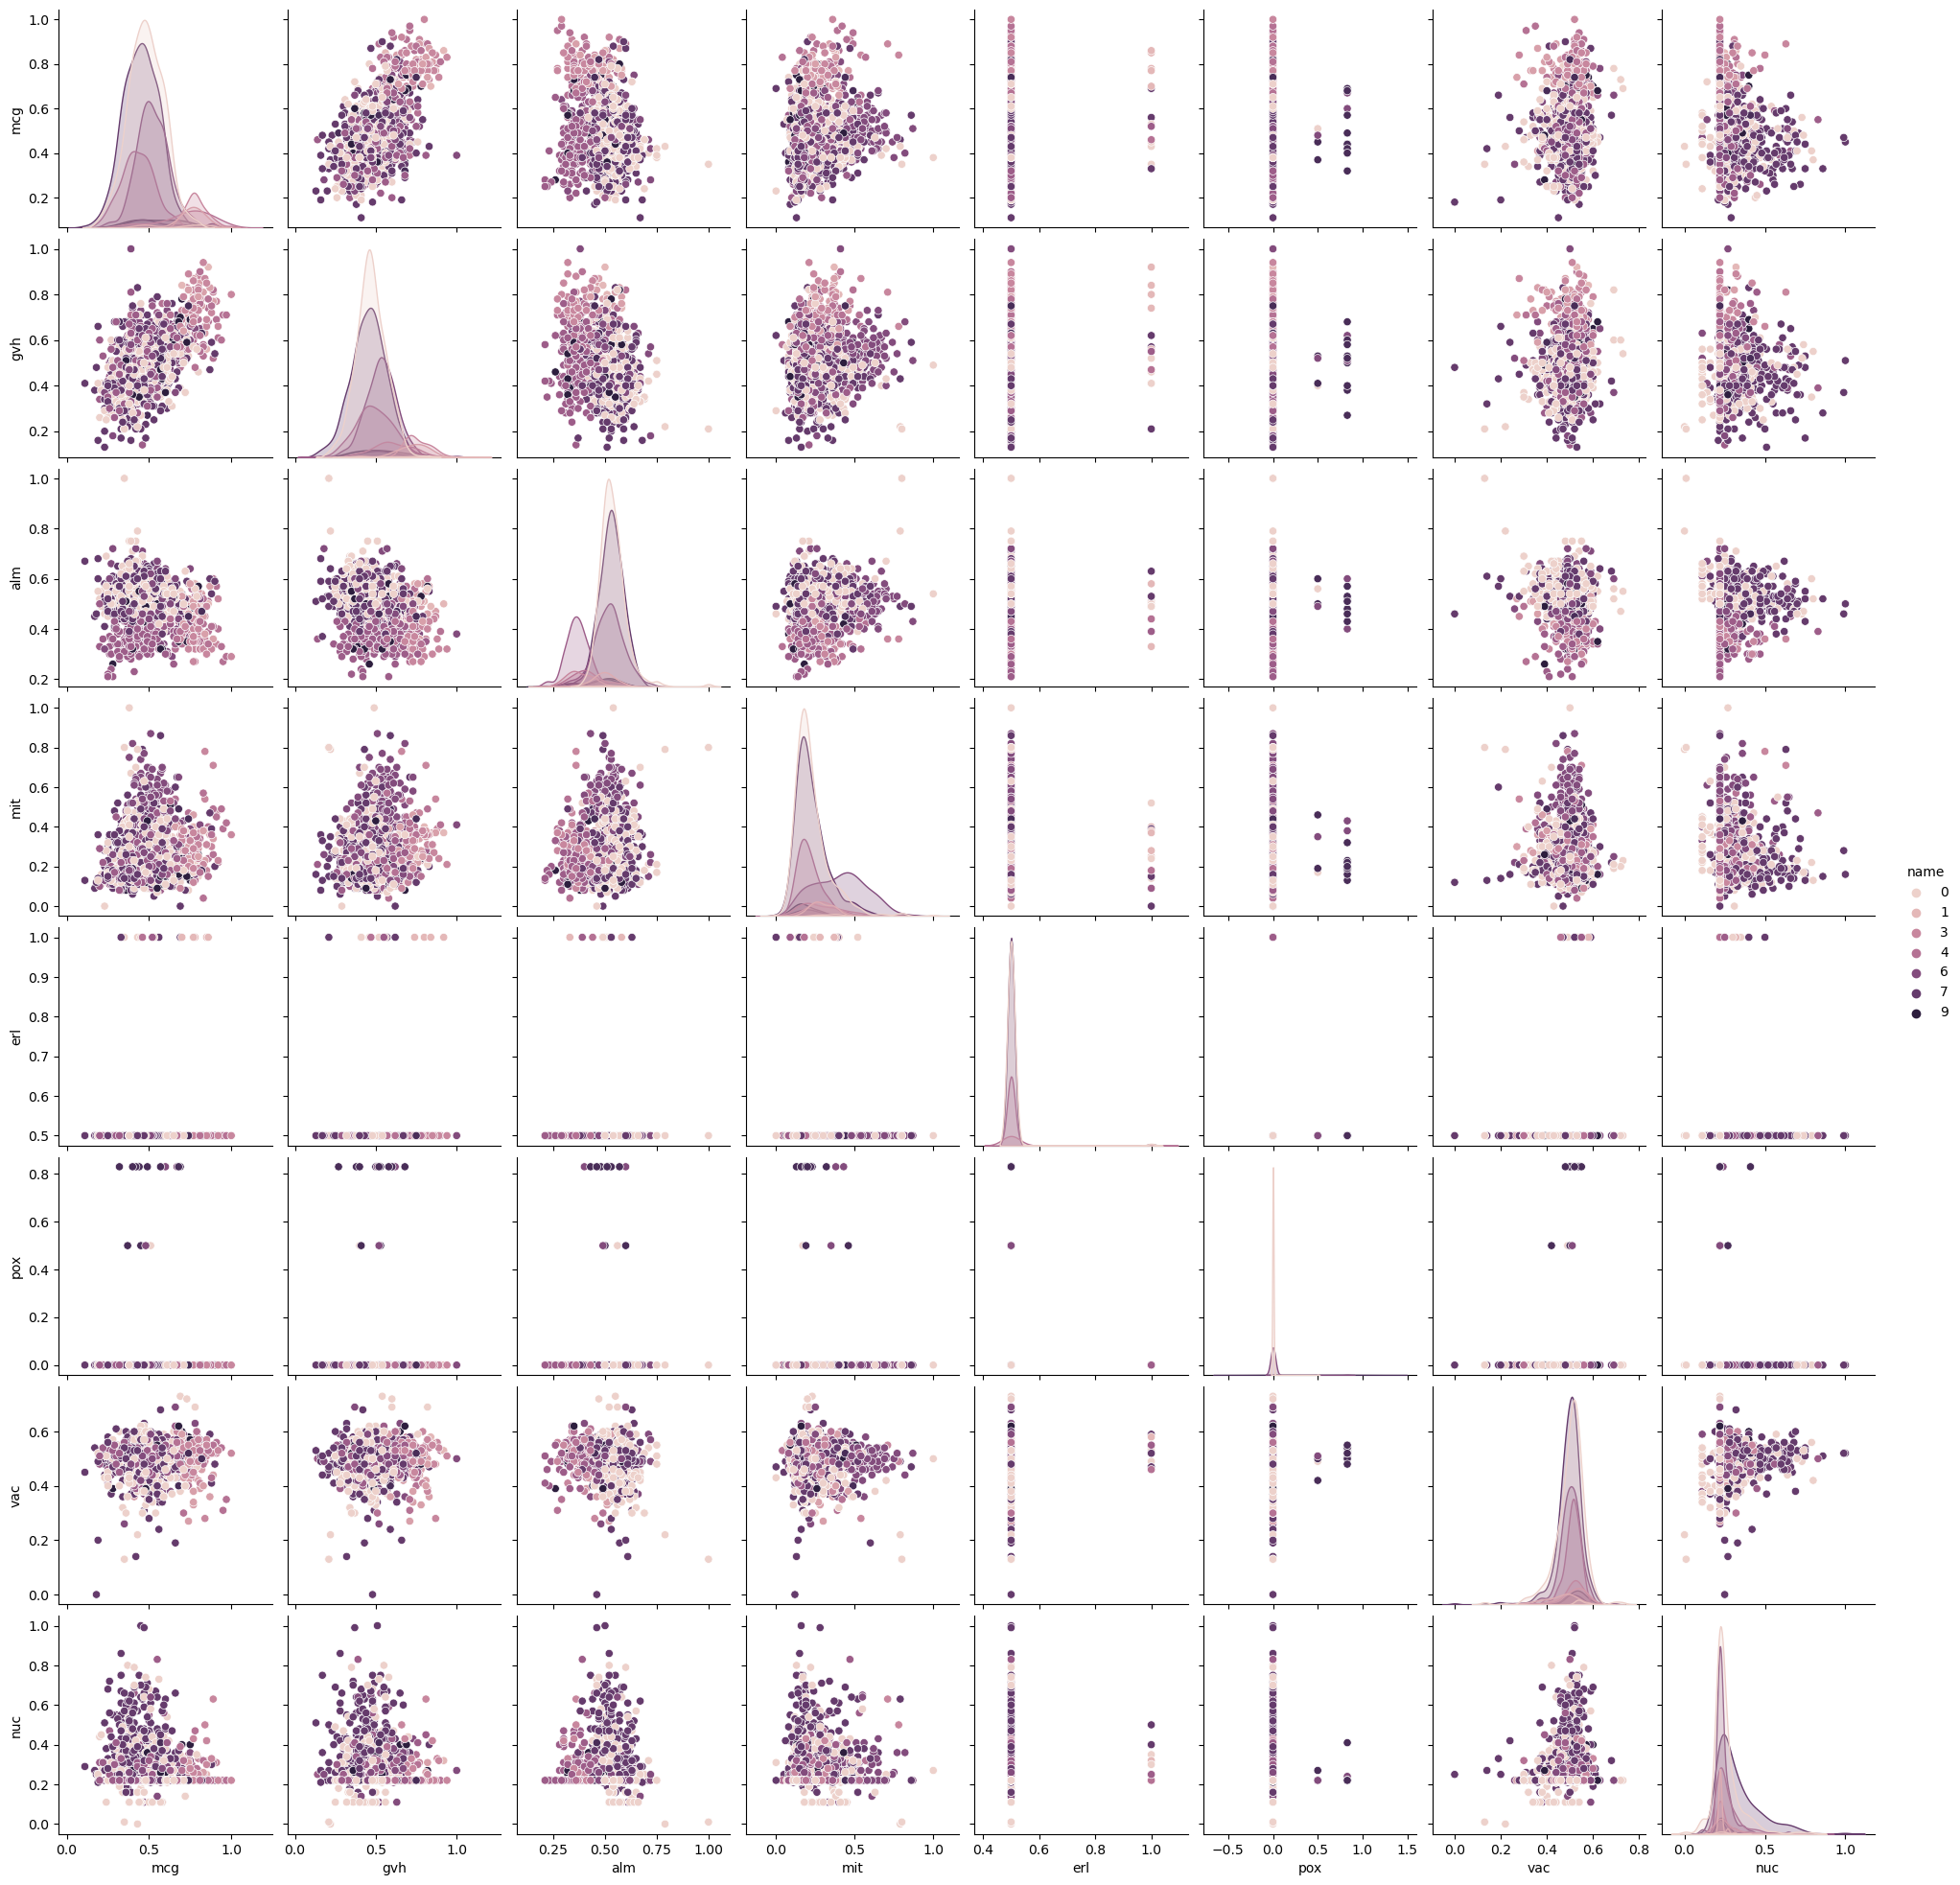

In [280]:
sns.pairplot(df,hue = "name")

<h3>As the Target variable contains the names , which is object type, We have converted the labels into numerical values using Label Encoder</h3>

In [289]:
#y = df['name']

# Encode the target variable if it is in string or categorical format
#label_encoder = LabelEncoder()
#y_encoded = label_encoder.fit_transform(y)

# Apply SMOTE to oversample the minority class
#smote = SMOTE(k_neighbors=3)
#X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Convert the resampled data back to DataFrame
#df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
#df_resampled['name'] = label_encoder.inverse_transform(y_resampled)

# Check the class distribution after resampling
#print(df_resampled['name'].value_counts())

In [235]:
# Convert the "name" column into numerical labels using LabelEncoder

le = LabelEncoder()
df['name'] = le.fit_transform(df['name'])
df.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,6
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,6
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,6
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,7
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,6


In [236]:
#df['name'].value_counts()

0    463
7    429
6    244
5    163
4     51
3     44
2     35
9     30
8     20
1      5
Name: name, dtype: int64

<h2>Correlation matrix</h2>
<p>Below is the Correlation matrix amongst the features. It shows that mcg and gvh features are co-related. they have correlation score of 0.58 as visible in the graph.</p>

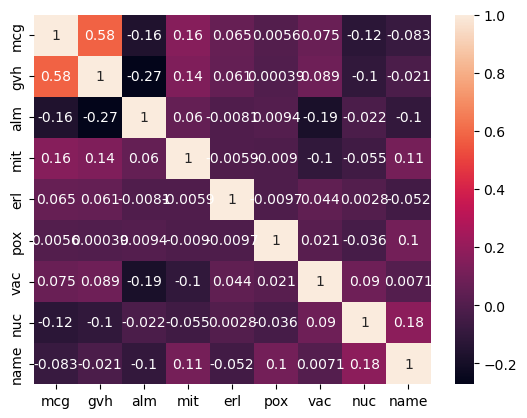

In [237]:
correlation_matrix=df.corr()
correlation_matrix
dataplot = sns.heatmap(df.corr(),annot=True)
plt.show()

<h3>Plotting Outliers for each Feature</h3>
<p>Here we have printed the outliers for each features using boxplot</p>

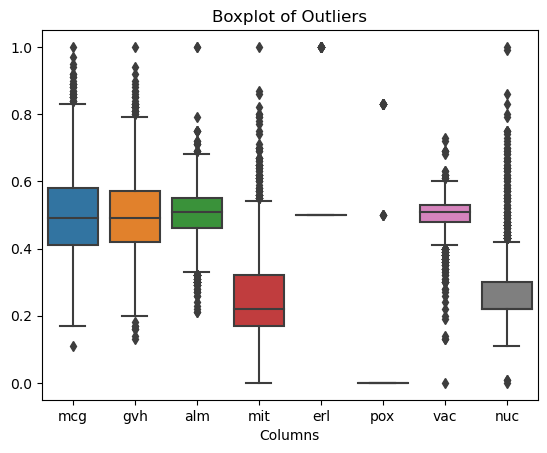

In [238]:
# Create a boxplot using Seaborn
X = df.drop(columns = ['name'])
sns.boxplot(data=X)
# Set plot title and labels
plt.title('Boxplot of Outliers')
plt.xlabel('Columns')

# Display the plot
plt.show()

In [239]:
#Here we separate the dataframe into two separate dataframe. X with the feature and y with the target.
X = df.drop(columns = ['name'])
y = df['name']
X.head()
print(X.shape)
print(y.shape)

(1484, 8)
(1484,)


<h2>Split the dataset into training and test sets</h2>
<h3>Case 1: 80% Train 20% Test</h3>
<h3>Case 2: 90% Train 10% Test</h3>

In [265]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y,test_size = 0.2)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y,test_size = 0.1)
print("Case1 Train: 80% Test 20%")
print(X_train1.shape,X_test_1.shape)
print(y_train1.shape,y_test_1.shape)
print("Case1 Train: 90% Test 10%")
print(X_train2.shape,X_test_2.shape)
print(y_train2.shape,y_test_2.shape)



Case1 Train: 80% Test 20%
(1187, 8) (297, 8)
(1187,) (297,)
Case1 Train: 90% Test 10%
(1335, 8) (149, 8)
(1335,) (149,)


In [279]:
model = LogisticRegression(multi_class='ovr')
model.fit(X_train_1, y_train_1)
y_predict_1 = model.predict(X_test_1)
train_score_1 = model.score(X_train_1, y_train_1)
test_score_1 = model.score(X_test_1, y_test_1)
print("The train score Case-1 is {}".format(train_score_1*100))
print("The test score Case-1 is {}".format(test_score_1*100))
accuracy_1 = accuracy_score(y_test_1, y_predict_1)
print("Accuracy Case-1: {:.2f}".format(accuracy_1*100))


model = LogisticRegression(multi_class='ovr')
model.fit(X_train_2, y_train_2)
y_predict_2 = model.predict(X_test_2)
train_score_2 = model.score(X_train_2, y_train_2)
test_score_2 = model.score(X_test_2, y_test_2)
print("The train score Case-2 is {}".format(train_score_2*100))
print("The test score Case-2 is {}".format(test_score2*100))
accuracy_2 = accuracy_score(y_test_2, y_predict_2)
print("Accuracy Case-2: {:.2f}".format(accuracy_2*100))

The train score Case-1 is 54.98127340823971
The test score Case-1 is 57.04697986577181
Accuracy Case-1: 57.05
The train score Case-2 is 54.08593091828138
The test score Case-2 is 57.71812080536913
Accuracy Case-2: 53.20


In [242]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state=200)
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1)
#print(X_train.shape,X_test.shape)
#print(y_train.shape,y_test.shape)

In [243]:
#model = LogisticRegression(multi_class='ovr')
#model.fit(X_train, y_train)
#y_predict = model.predict(X_test)
#accuracy_score(y_test, y_predict)

<h3>K Fold Cross Validation</h3>
<p>We have used kfold cross-validation with a pipeline that includes data preprocessing using StandardScaler() and logistic regression as the classifier.</p>
<p>This data is split into training and testing sets using 90:10 split</p>
<p>The pipeline includes StandardScaler() for feature scaling and LogisticRegression() with multi_class='ovr' for multiclass classification using the "one-vs-rest" strategy.<p>
 
<p>We have used StratifiedKFold with 5 splits and split the training data into k-folds using split(). Stratified k-fold cross-validation ensures that the class distribution is maintained in each fold.</p>
<p>In the loop, the pipeline is fitted on the training data for each fold (pipeline.fit()) and the accuracy score is computed on the corresponding test data (pipeline.score()). The accuracy scores for each fold are stored in the scores list.</p>
<p.The loop also prints the fold number, the class distribution of the training/test split, and the accuracy score for each fold. Finally, after the loop, the mean and standard deviation of the accuracy scores across all folds are printed as the cross-validation accuracy.</p>

In [276]:
#K Fold Validation with Case 1
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

pipeline = make_pipeline(LogisticRegression(multi_class='ovr'))
strtfdKFold = StratifiedKFold(n_splits=5)
kfold = strtfdKFold.split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
    print('\nCross-Validation accuracy: %.3f +/- %.3f \n' %(np.mean(scores), np.std(scores)))    

C:\Users\ECGC31\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Fold:  1, Training/Test Split Distribution: [287   3  21  30  28 109 161 273  14  23], Accuracy: 0.563

Cross-Validation accuracy: 0.563 +/- 0.000 

Fold:  2, Training/Test Split Distribution: [288   3  22  29  28 109 160 273  15  22], Accuracy: 0.563

Cross-Validation accuracy: 0.563 +/- 0.000 

Fold:  3, Training/Test Split Distribution: [287   4  22  29  28 110 161 272  15  22], Accuracy: 0.506

Cross-Validation accuracy: 0.544 +/- 0.027 

Fold:  4, Training/Test Split Distribution: [287   3  22  30  28 110 161 273  14  22], Accuracy: 0.553

Cross-Validation accuracy: 0.546 +/- 0.023 

Fold:  5, Training/Test Split Distribution: [287   3  21  30  28 110 161 273  14  23], Accuracy: 0.502

Cross-Validation accuracy: 0.537 +/- 0.027 



In [277]:
#K Fold Validation with Case 2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1)

pipeline = make_pipeline(LogisticRegression(multi_class='ovr'))
strtfdKFold = StratifiedKFold(n_splits=5)
kfold = strtfdKFold.split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
    print('\nCross-Validation accuracy: %.3f +/- %.3f \n' %(np.mean(scores), np.std(scores)))    

C:\Users\ECGC31\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Fold:  1, Training/Test Split Distribution: [335   4  25  31  33 112 176 314  15  23], Accuracy: 0.543

Cross-Validation accuracy: 0.543 +/- 0.000 

Fold:  2, Training/Test Split Distribution: [335   3  25  31  32 113 177 314  16  22], Accuracy: 0.528

Cross-Validation accuracy: 0.536 +/- 0.007 

Fold:  3, Training/Test Split Distribution: [336   3  25  30  33 113 177 314  15  22], Accuracy: 0.543

Cross-Validation accuracy: 0.538 +/- 0.007 

Fold:  4, Training/Test Split Distribution: [335   3  25  30  33 113 177 315  15  22], Accuracy: 0.517

Cross-Validation accuracy: 0.533 +/- 0.011 

Fold:  5, Training/Test Split Distribution: [335   3  24  30  33 113 177 315  15  23], Accuracy: 0.562

Cross-Validation accuracy: 0.539 +/- 0.015 



<h2>Model Building with Regularization</h2>
<p>In this example, we split the data into training and testing sets using train_test_split(). </p>
<p><b>Then, we create a logistic regression model with L2 regularization (Ridge) by setting penalty='l2' in the LogisticRegression The C parameter is set to 10.0, which controls the inverse of the regularization strength.</b></p>
<p>After fitting the model to the training data using fit(), we have calculated the accuracy score.</p>

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy score without regularization:", accuracy*100)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_predict)
print("The train score is {}".format(train_score_2*100))
print("The test score is {}".format(test_score2*100))

# Apply logistic regression with L2 regularization
model = LogisticRegression(multi_class='ovr',penalty='l2', C=10.0)
model.fit(X_train, y_train)

# Make predictions on the test set
y_predict = model.predict(X_test)
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy score with regularization:", accuracy*100)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_predict)
print("The train score is {}".format(train_score_2*100))
print("The test score is {}".format(test_score2*100))


Accuracy score without regularization: 57.23905723905723
The train score is 54.08593091828138
The test score is 57.71812080536913
Accuracy score with regularization: 61.95286195286195
The train score is 54.08593091828138
The test score is 57.71812080536913


In [273]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.1)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2)

# Create and fit the logistic regression models
model_1 = LogisticRegression(multi_class='ovr')
model_1.fit(X_train_1, y_train_1)

model_2 = LogisticRegression(multi_class='ovr')
model_2.fit(X_train_2, y_train_2)

# Make predictions on the test sets
y_pred_1 = model_1.predict(X_test_1)
y_pred_2 = model_2.predict(X_test_2)

# Calculate evaluation metrics for the 90:10 split
accuracy_1 = accuracy_score(y_test_1, y_pred_1)
precision_1 = precision_score(y_test_1, y_pred_1,average='micro')
recall_1 = recall_score(y_test_1, y_pred_1,average='micro')
f1_1 = f1_score(y_test_1, y_pred_1,average='micro')


# Calculate evaluation metrics for the 80:20 split
accuracy_2 = accuracy_score(y_test_2, y_pred_2)
precision_2 = precision_score(y_test_2, y_pred_2,average='micro')
recall_2 = recall_score(y_test_2, y_pred_2,average='micro')
f1_2 = f1_score(y_test_2, y_pred_2,average='micro')


# Print the evaluation metrics for the 90:10 split
print("90:10 Split Evaluation Metrics:")
print("Accuracy:", accuracy_1)
print("Precision:", precision_1)
print("Recall:", recall_1)
print("F1 Score:", f1_1)
print()

# Print the evaluation metrics for the 80:20 split
print("80:20 Split Evaluation Metrics:")
print("Accuracy:", accuracy_2)
print("Precision:", precision_2)
print("Recall:", recall_2)
print("F1 Score:", f1_2)

# Choose the best metric for each split
best_metric_1 = max(accuracy_1, precision_1, recall_1, f1_1)
best_metric_2 = max(accuracy_2, precision_2, recall_2, f1_2)

# Determine the best metric name for each split
best_metric_name_1 = ""
best_metric_name_2 = ""

if best_metric_1 == accuracy_1:
    best_metric_name_1 = "Accuracy"
elif best_metric_1 == precision_1:
    best_metric_name_1 = "Precision"
elif best_metric_1 == recall_1:
    best_metric_name_1 = "Recall"
else:
    best_metric_name_1 = "F1 Score"

if best_metric_2 == accuracy_2:
    best_metric_name_2 = "Accuracy"
elif best_metric_2 == precision_2:
    best_metric_name_2 = "Precision"
elif best_metric_2 == recall_2:
    best_metric_name_2 = "Recall"
else:
    best_metric_name_2 = "F1 Score"

# Print the best metric for each split
print("Best Metric for 90:10 Split:", best_metric_name_1)
print("Best Metric for 80:20 Split:", best_metric_name_2)

90:10 Split Evaluation Metrics:
Accuracy: 0.5704697986577181
Precision: 0.5704697986577181
Recall: 0.5704697986577181
F1 Score: 0.5704697986577181

80:20 Split Evaluation Metrics:
Accuracy: 0.531986531986532
Precision: 0.531986531986532
Recall: 0.531986531986532
F1 Score: 0.531986531986532
Best Metric for 90:10 Split: Accuracy
Best Metric for 80:20 Split: Accuracy


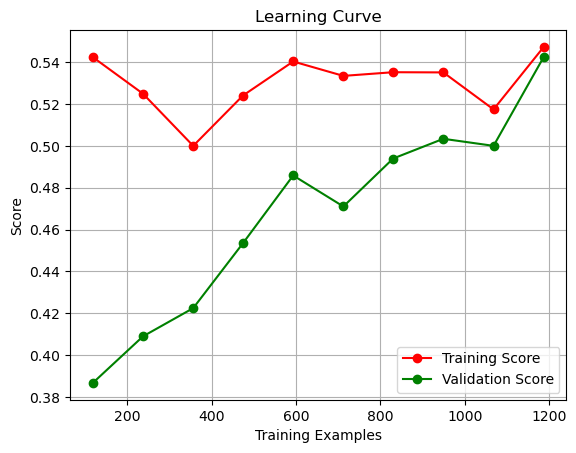

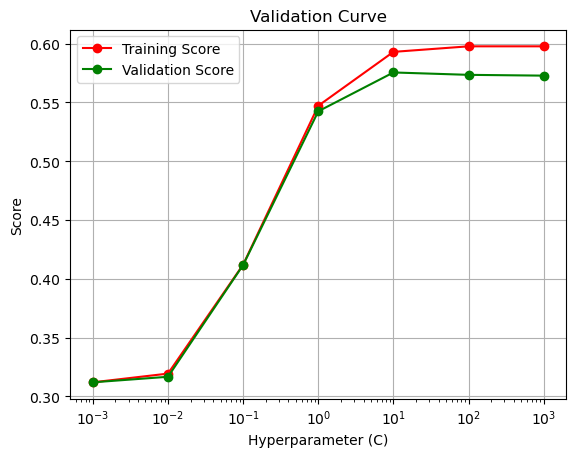

In [282]:
model = LogisticRegression(multi_class='ovr')

# Plot the learning curve
train_sizes, train_scores, val_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation Score")
plt.legend(loc="best")
plt.show()

# Plot the validation curve
param_range = np.logspace(-3, 3, 7)
train_scores, val_scores = validation_curve(model, X, y, param_name="C", param_range=param_range, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure()
plt.title("Validation Curve")
plt.xlabel("Hyperparameter (C)")
plt.ylabel("Score")
plt.grid()
plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(param_range, val_scores_mean, 'o-', color="g", label="Validation Score")
plt.legend(loc="best")
plt.xscale('log')
plt.show()